In [18]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler 
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation
 

In [19]:
# import data set from the local driver 


df1=pd.read_csv('train1_20.csv', sep=';' )# , engine='python')
df2=pd.read_csv('train2_20.csv', sep=';' )
df3=pd.read_csv('test1_20.csv', sep=';' )
df4=pd.read_csv('test2_20.csv', sep=';' )

frames = [df1,df2,df3,df4] 
df_concat=pd.concat(frames) 
print("The dataset has {} records".format(len(df_concat)))
df_concat.head(5)



The dataset has 706345 records


,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0.0,0.0,0.0,0.0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0.0,0.0,0.0,0.0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0.0,0.0,0.0,0.0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0.0,0.0,0.0,0.0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0.0,0.0,0.0,0.0


In [20]:
df_concat.shape 

(706345, 64)

In [21]:
# drop the columns that are under attack in each stage. 
df1=df_concat.drop(['attack_P1','attack_P2','attack_P3'],axis=1)#, inplace=True)   

In [22]:
# make the Timestamp to datetime datatype 
df1['time'] = pd.to_datetime(df1['time']) # conveting the date time stamp to the timestamp series 
df1.head() 
# # df1.shape

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,57.8704,0.0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0.0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,58.4853,0.0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0.0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,59.2629,0.0,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0.0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,59.8235,0.0,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0.0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,60.3118,0.0,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0.0


In [23]:
# a Timestamp as index 
df1= df1.set_index('time') 
df1.head()  

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,0.2838,...,57.8704,0.0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,0.2838,...,58.4853,0.0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,0.2914,...,59.2629,0.0,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,0.2762,...,59.8235,0.0,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,0.2838,...,60.3118,0.0,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0.0


##### Interpolation the data with each time stamp 

In [24]:
# resample the data with 5 second 
df1=df1.resample('30s').mean()
df1.interpolate(method='linear',order=2)
df1.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.086703,399.2321,1110.3986,32.0,0.000477,31.381620,35.794627,0.0,0.284057,...,63.831925,0.0,406.934798,-0.000290,338.821377,335.410637,50.9871,9973.000000,27628.933333,0.0
2019-09-11 20:00:30,0.0983,1.111473,399.2321,1110.3986,32.0,0.000627,32.474047,35.877173,0.0,0.283800,...,68.297292,0.0,412.591937,0.000875,343.762050,342.966943,50.9871,9955.166667,27628.933333,0.0
2019-09-11 20:01:00,0.0983,1.109256,399.2321,1110.3986,32.0,0.001003,31.563708,35.871377,0.0,0.283800,...,68.475707,0.0,407.671447,0.000947,339.465180,341.654010,50.9871,9963.500000,27629.000000,0.0
2019-09-11 20:01:30,0.0983,1.025703,399.2321,1110.3986,32.0,0.000000,32.606467,35.591320,0.0,0.283800,...,33.621480,0.0,319.395020,-0.000367,300.258013,312.008093,50.9871,9971.933333,27628.933333,0.0
2019-09-11 20:02:00,0.0983,0.957073,399.2321,1110.3986,32.0,0.000000,32.143030,35.362557,0.0,0.284053,...,2.820577,0.0,291.483417,-0.000607,291.503297,291.626887,50.9871,9972.200000,27629.000000,0.0


In [25]:
df1.shape

(160020, 60)

None


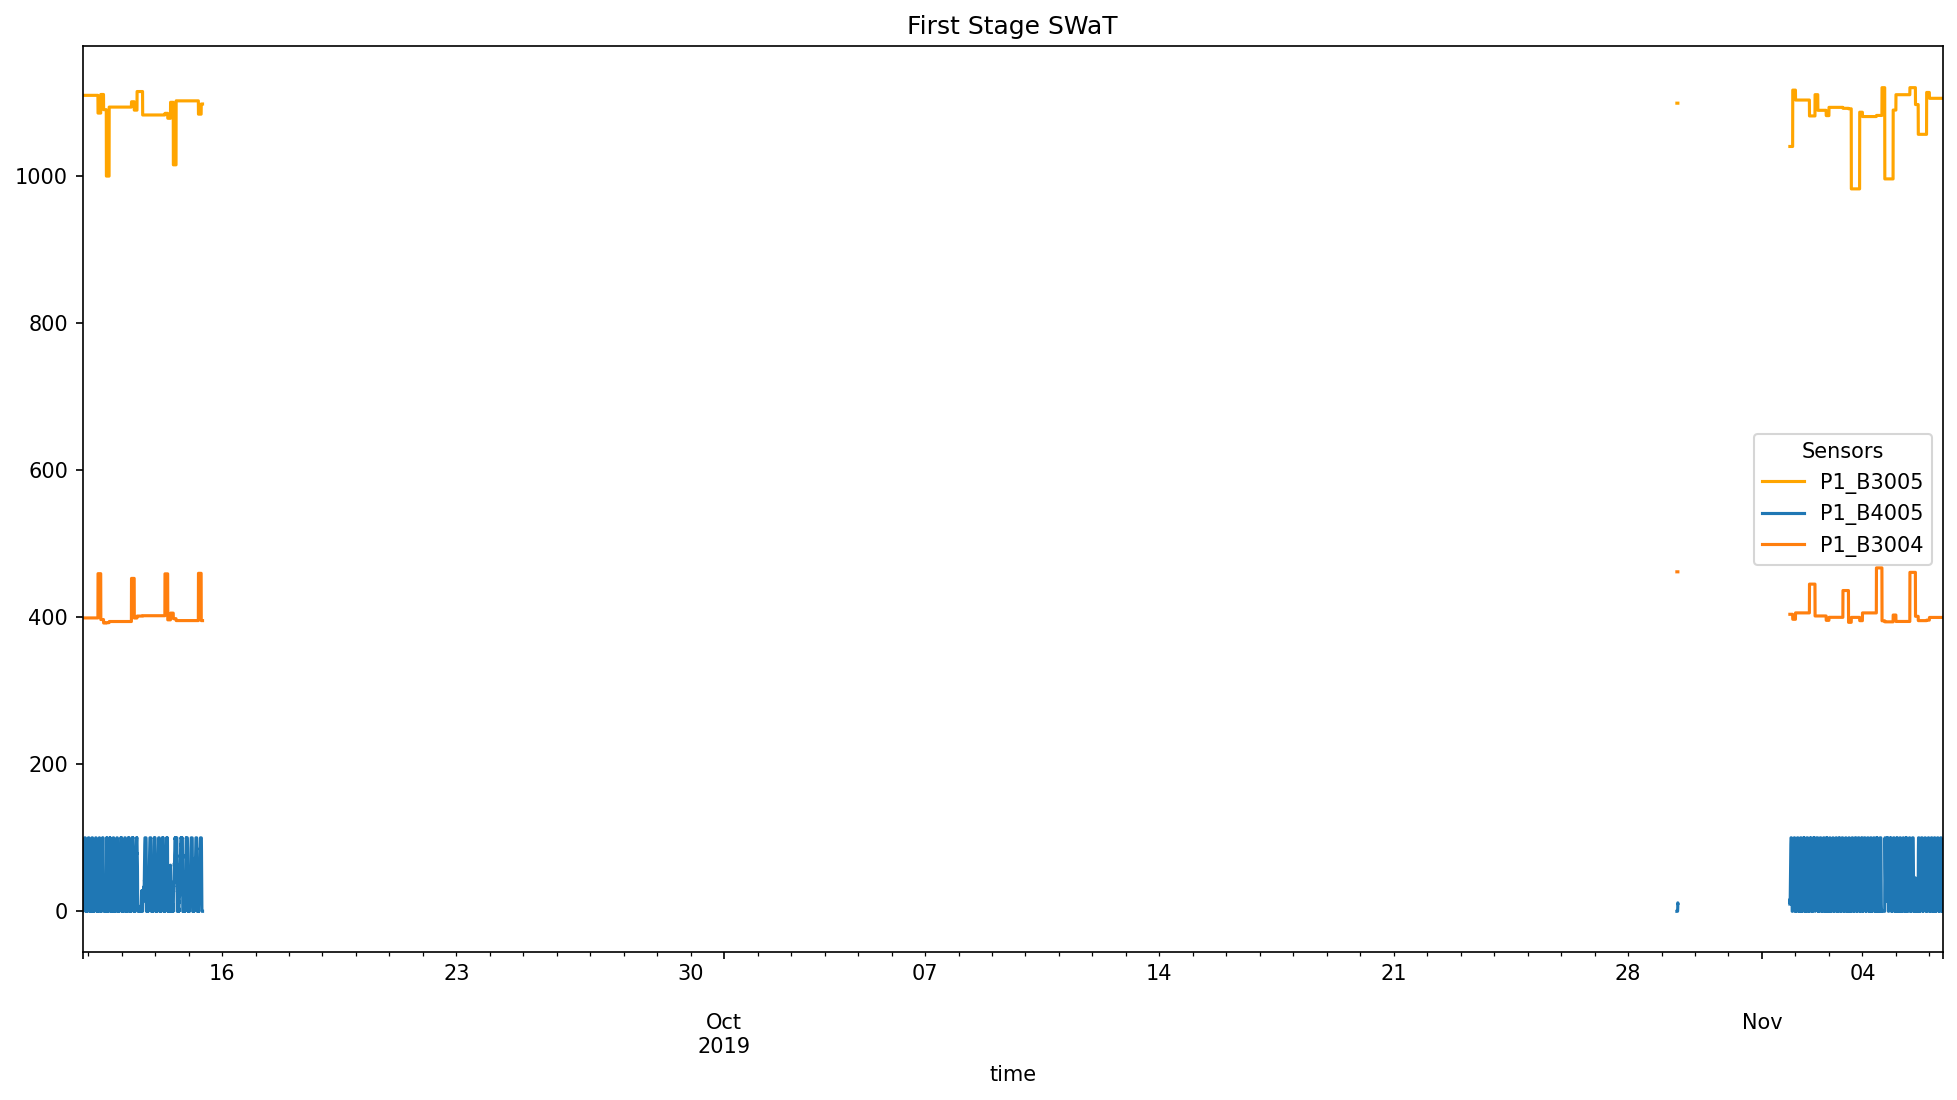

In [26]:
# Visualizing The first stage with respect to time series  
def plot (): 
    plt.figure(figsize=(16, 8), dpi=150) 
    df1['P1_B3005'].plot(label='P1_B3005', color='orange') 
    df1['P1_B4005'].plot(label='P1_B4005')
    df1['P1_B3004'].plot(label='P1_B3004') 
    # adding title to the plot 
    plt.title('First Stage SWaT') 
    # adding Label to the x-axis 
    plt.xlabel('time') 
    # adding legend to the curve 
    plt.legend(title='Sensors')
    
print (plot ()) 
 

#### Visualize the dataset 
-  Plotting the number of normal and Attack transactions in the dataset. 

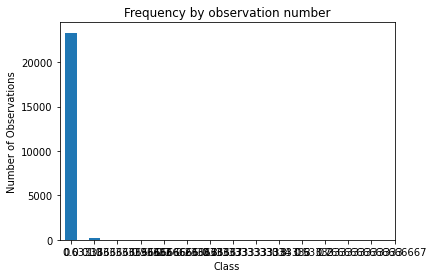

In [27]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(df1['attack'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['attack'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");  

In [28]:
# make the class label into 2 since during sampling and interpolation it create the new class labels
df1.loc[df1['attack'] >= 0.1, 'lablel'] = 1 
df1.loc[df1['attack'] ==0.0, 'lablel'] = 0

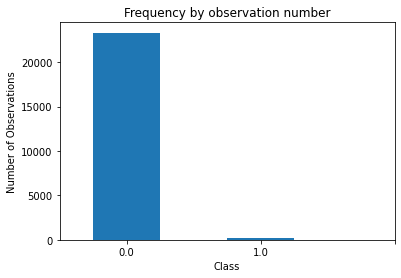

In [29]:
#Visualizing the imbalanced dataset
count_classes2 = pd.value_counts(df1['lablel'], sort = True)
count_classes2.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations"); 

In [30]:
# fill the missing values with forward and backward of the cols 

df1=df1.fillna(method="ffill") 

In [31]:
df1.isna().sum() 

P1_B2004      0
P1_B2016      0
P1_B3004      0
P1_B3005      0
P1_B4002      0
             ..
P4_ST_PS      0
P4_ST_PT01    0
P4_ST_TT01    0
attack        0
lablel        0
Length: 61, dtype: int64

In [32]:
#Count 1 unique values in each columns
df2=df1.nunique().reset_index()
df2.columns = ['feature','number Of unique']
df2[df2['number Of unique']==1]  

,feature,number Of unique
32,P2_Auto,1
33,P2_Emgy,1
34,P2_On,1
37,P2_TripEx,1
45,P3_LH,1
46,P3_LL,1
51,P4_HT_PS,1


In [33]:
# drop the  cols 
#df1= df1.drop('P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS', axis=0) 

# drop two columns name is 'C' and 'D'
df1=df1.drop(['P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS','attack'], axis=1) 

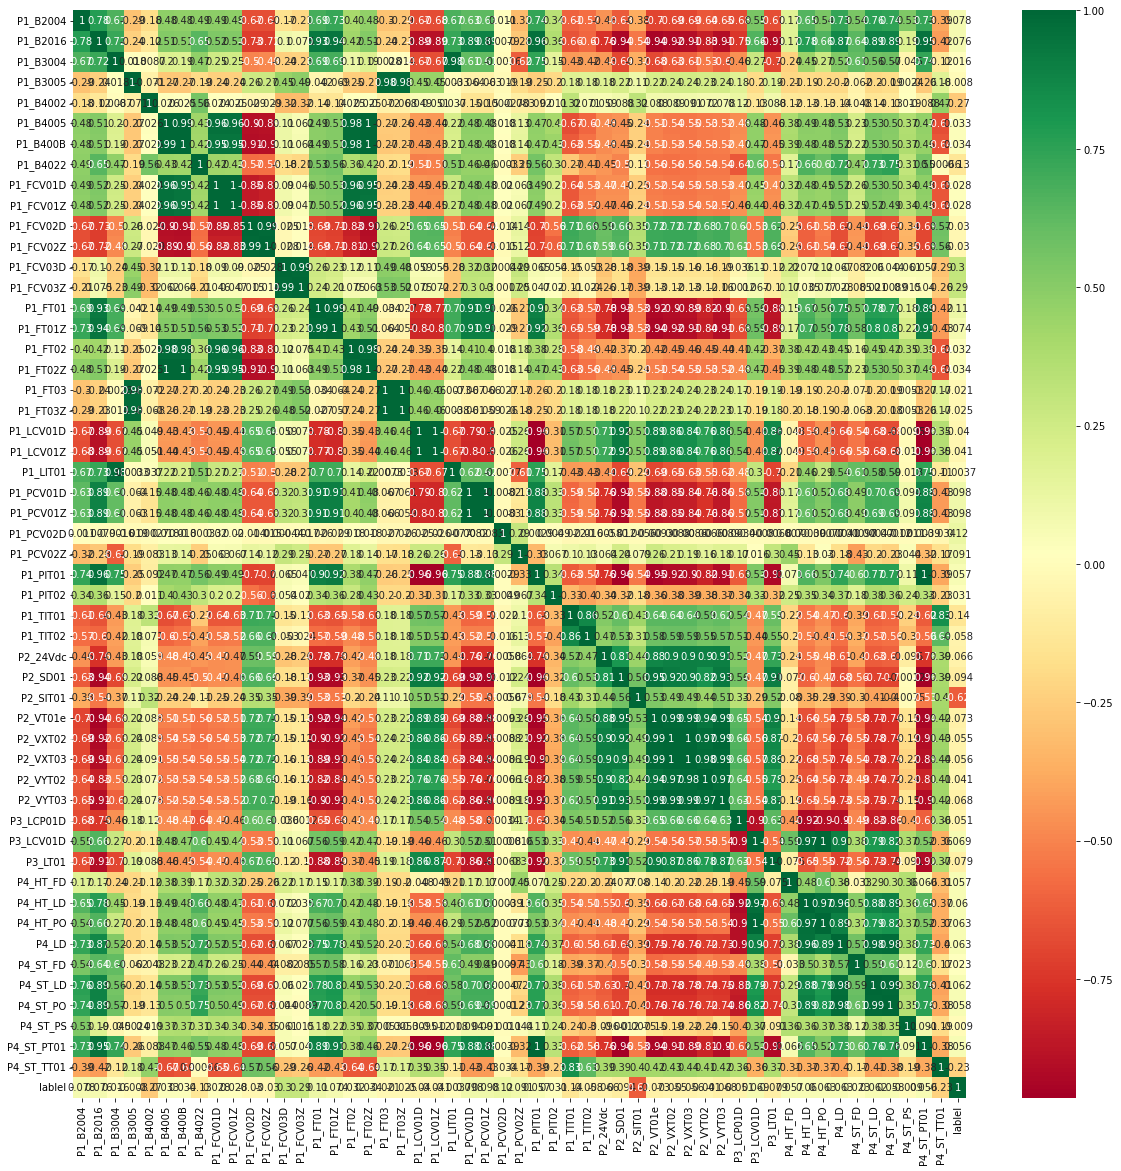

In [17]:
import seaborn as sns


#get correlations of each features in dataset
c = df1.corr()
top_corr_features = c.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")  

In [129]:
c=c.lablel.sort_values(ascending=False).head(42).keys().drop('lablel') # corelation
print(c) 

Index(['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2004', 'P1_B2016', 'P1_FT01Z',
       'P3_LCV01D', 'P4_LD', 'P4_HT_PO', 'P4_ST_LD', 'P4_HT_LD', 'P4_ST_PO',
       'P1_PIT01', 'P4_HT_FD', 'P4_ST_PT01', 'P1_B400B', 'P1_FT02Z',
       'P1_B4005', 'P1_FT02', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P4_ST_FD',
       'P1_B3004', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02D', 'P1_FCV02Z', 'P1_LCV01D', 'P2_VYT02', 'P1_LCV01Z',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03'],
      dtype='object')


In [34]:
# Select Multiple Columns
df2 = df1.loc[:,['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03','lablel']] 

In [35]:
df2.shape 

(160020, 42)

In [36]:
#To see how the data is spread betwen Attack and Normal 
#print(df1.groupby('Normal/Attack')['Normal/Attack'].count()) 
print(df2.groupby('lablel')['lablel'].count()) 

lablel
0.0    159783
1.0       237
Name: lablel, dtype: int64


In [37]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160020 entries, 2019-09-11 20:00:00 to 2019-11-06 09:29:30
Freq: 30S
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   P1_FCV03D   160020 non-null  float64
 1   P1_FCV03Z   160020 non-null  float64
 2   P1_PCV02D   160020 non-null  float64
 3   P1_FT01     160020 non-null  float64
 4   P1_PCV01D   160020 non-null  float64
 5   P1_PCV01Z   160020 non-null  float64
 6   P1_PCV02Z   160020 non-null  float64
 7   P1_B2016    160020 non-null  float64
 8   P1_B2004    160020 non-null  float64
 9   P1_FT01Z    160020 non-null  float64
 10  P4_ST_LD    160020 non-null  float64
 11  P4_ST_PO    160020 non-null  float64
 12  P4_LD       160020 non-null  float64
 13  P3_LCV01D   160020 non-null  float64
 14  P1_PIT01    160020 non-null  float64
 15  P4_ST_PT01  160020 non-null  float64
 16  P4_HT_PO    160020 non-null  float64
 17  P4_HT_LD    160020 non-null  float64
 18  

#### Normalize using min Max scaler 

In [38]:
con_feats = ['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03'] 
scaler = MinMaxScaler() 
df2[con_feats] = scaler.fit_transform(df2[con_feats])
df2.head()   

,P1_FCV03D,P1_FCV03Z,P1_PCV02D,P1_FT01,P1_PCV01D,P1_PCV01Z,P1_PCV02Z,P1_B2016,P1_B2004,P1_FT01Z,...,P1_FT03Z,P1_FCV02Z,P1_FCV02D,P1_LCV01Z,P2_VYT02,P1_LCV01D,P3_LCP01D,P2_VXT02,P2_VXT03,lablel
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.178959,0.185709,0.0,0.219458,0.318049,0.330274,0.038018,0.524037,0.950413,0.423147,...,0.579721,0.988649,1.0,0.420829,0.581068,0.429467,0.044772,0.764642,0.704197,0.0
2019-09-11 20:00:30,0.181133,0.183348,0.0,0.235147,0.327439,0.330274,0.038018,0.537314,0.950413,0.453222,...,0.577675,0.988531,1.0,0.444375,0.564924,0.439191,0.009928,0.729376,0.689857,0.0
2019-09-11 20:01:00,0.178794,0.182769,0.0,0.233637,0.337944,0.341696,0.037942,0.536126,0.950413,0.451246,...,0.581024,0.988636,1.0,0.444403,0.585216,0.432742,0.002140,0.749709,0.702152,0.0
2019-09-11 20:01:30,0.173307,0.182610,0.0,0.226908,0.334206,0.342445,0.037968,0.491339,0.950413,0.438807,...,0.583811,0.988618,1.0,0.427383,0.563387,0.417054,0.335181,0.761804,0.682890,0.0
2019-09-11 20:02:00,0.170282,0.182618,0.0,0.219410,0.315686,0.327623,0.037968,0.454551,0.950413,0.421841,...,0.580479,0.988701,1.0,0.426044,0.555782,0.407888,0.844778,0.738994,0.679679,0.0


#### Split the Data to train and Test 

In [39]:
# split the normal data with respect to test and Train 
from sklearn.model_selection import train_test_split 
x_good_train, x_good_test = train_test_split(df2, test_size=0.2, random_state=42)   

In [40]:
print(x_good_train.shape)
print(x_good_test.shape) 

(128016, 42)
(32004, 42)


In [41]:
# Training and testing with removing the class 
x_good_train = x_good_train[x_good_train.lablel == 0.0] #where normal transactions 
x_good_train = x_good_train.drop(['lablel'], axis=1) #drop the class columns 

test_y = x_good_test['lablel'] # save the class column for the test set 
x_good_test = x_good_test.drop(['lablel'], axis=1) #drop the class column 

x_good_train = x_good_train.values #transform to ndarray 
x_good_test = x_good_test.values 
x_good_train.shape, x_good_test.shape #,x_good_train.shape,test_y.shape     

((127831, 41), (32004, 41))

#### Build Model  

In [42]:
######### 
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from keras.layers import Input, Dense
from keras import regularizers 
from keras.models import Model, load_model 
import datetime  

In [43]:
#TIME_STEPS = 288 
model = Sequential()
# encoder 
model.add(Dense(128, input_dim=x_good_train.shape[1], activation='relu')) # Input layers or encoder sigmoid relu
Dropout(0.01), 
model.add(Dense(32, activation='relu')) ## 
Dropout(0.01), 
# model.add(Dense(32, activation='relu')) ## 
# Dropout(0.01), 

model.add(Dense(128, activation='relu')) ## decoder 
Dropout(0.1), 
model.add(Dense(x_good_train.shape[1])) # output layers 
model.compile(loss='msle',metrics=['accuracy'],optimizer='adam')  
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5376      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 41)                5289      
                                                                 
Total params: 19,017
Trainable params: 19,017
Non-trainable params: 0
_________________________________________________________________


### Train the model
Please note that we are using x_good_test as both the input and the target since this is a reconstruction model.

In [44]:
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100) 
grid=model.fit(
    x_good_train,x_good_train,
    verbose=2,
    epochs=10,
    batch_size=512,
    validation_data=(x_good_test, x_good_test), 
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])  
score=model.evaluate(x_good_test, x_good_test, verbose=1)
print('Test loss:', score[0]) 
print('accuracy:', score[1])   

Epoch 1/10
250/250 - 2s - loss: 0.0141 - accuracy: 0.7606 - val_loss: 0.0090 - val_accuracy: 0.8381 - 2s/epoch - 8ms/step
Epoch 2/10
250/250 - 1s - loss: 0.0089 - accuracy: 0.8950 - val_loss: 0.0089 - val_accuracy: 0.8964 - 1s/epoch - 6ms/step
Epoch 3/10
250/250 - 1s - loss: 0.0088 - accuracy: 0.9028 - val_loss: 0.0088 - val_accuracy: 0.9118 - 1s/epoch - 6ms/step
Epoch 4/10
250/250 - 1s - loss: 0.0088 - accuracy: 0.9084 - val_loss: 0.0088 - val_accuracy: 0.9149 - 1s/epoch - 6ms/step
Epoch 5/10
250/250 - 1s - loss: 0.0088 - accuracy: 0.9114 - val_loss: 0.0088 - val_accuracy: 0.9191 - 1s/epoch - 6ms/step
Epoch 6/10
250/250 - 1s - loss: 0.0088 - accuracy: 0.9134 - val_loss: 0.0088 - val_accuracy: 0.9203 - 1s/epoch - 6ms/step
Epoch 7/10
250/250 - 1s - loss: 0.0087 - accuracy: 0.9157 - val_loss: 0.0088 - val_accuracy: 0.9179 - 1s/epoch - 6ms/step
Epoch 8/10
250/250 - 1s - loss: 0.0087 - accuracy: 0.9188 - val_loss: 0.0087 - val_accuracy: 0.9197 - 1s/epoch - 6ms/step
Epoch 9/10
250/250 - 1s 

#### Plot training and test loss  

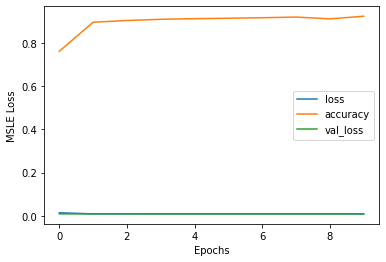

In [45]:
plt.plot(grid.history['loss'])
plt.plot(grid.history['accuracy'])
plt.plot(grid.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss','accuracy', 'val_loss'])
plt.show()   

### Detect Anomalies on test data  
- Anomalies are data points where the reconstruction loss is higher 
- To calculate the reconstruction loss on test data, predict the test data and calculate the mean square error between the test data and the reconstructed test data. 

#### Predictions and Computing Reconstruction Error 

In [47]:
test_x_predictions = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions,2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)  
error_df.head()

,Reconstruction_error,A
time,,
2019-11-03 01:38:30,0.127306,0.0
2019-11-02 09:08:00,0.148122,0.0
2019-10-08 08:46:00,0.083595,0.0
2019-10-11 10:43:30,0.083595,0.0
2019-10-21 00:52:00,0.083595,0.0


In [48]:
# find the maximum of each column using reconstruction error 
maxValues = error_df.max()
 
print(maxValues) 

Reconstruction_error    0.330364
A                       1.000000
dtype: float64


In [49]:
# finding the number of anomalies using highest reconstruction Error 

outliers = error_df.index[error_df.Reconstruction_error >0.33].tolist()  
number_of_outliers = len(outliers) 
print("Number of elements in the anomalies: ", number_of_outliers)  

Number of elements in the anomalies:  1


In [50]:
# To identify the maximum and minimum data point for identifying bins 
import tensorflow as tf 
# reconstruction loss for normal test data
#reconstructions = model.predict(normal_test_data)
train_loss1 = tf.keras.losses.mae(test_x_predictions, x_good_test)


trainloss1=pd.DataFrame(train_loss1)
#trainloss.describe()
#trainloss.to_csv(r'/home/jovyan/trainloss.csv',index=False) 
trainloss1.describe()  
  

,0
count,32004.000000
mean,0.117292
std,0.020187
min,0.109588
25%,0.109588
50%,0.109588
75%,0.109588
max,0.323043


Text(0.5, 1.0, 'bins - loss distribution = 16')

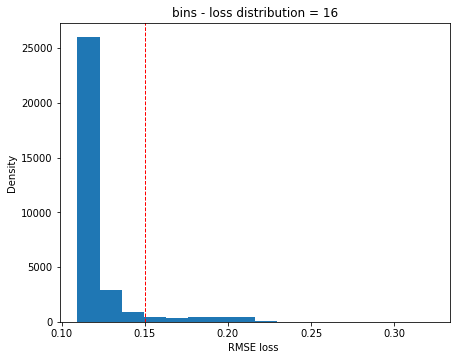

In [59]:
# rules-of-thumb to identify the number of bins Freedman–Diaconis rule 
trainloss1=pd.DataFrame(trainloss1) 
q1 = trainloss1.quantile(0)
q3 = trainloss1.quantile(1)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(trainloss1) ** (1 / 3))
bin_count = int(np.ceil((trainloss1.max() - trainloss1.min()) / bin_width))
fig = plt.figure(figsize=(7,5.5))
plt.hist(train_loss1, bins = bin_count)  
#sns.histplot(x=trainloss,bins=bin_count)
plt.axvline(0.15,0, 9000,color='red', linestyle='dashed', linewidth=1) 
plt.xlabel('RMSE loss ')
plt.ylabel('Density')
plt.title(f'bins - loss distribution = {bin_count}') 

### Model Interpretability 

In [52]:
# change X_tes_scaled to pandas dataframe
data_n = pd.DataFrame(x_good_test, index= test_y.index)#, columns=numerical_cols)  

In [53]:
def compute_error_per_dim(point):
    
    initial_pt = np.array(data_n.loc[point,:]).reshape(1,9)
    reconstrcuted_pt = model.predict(initial_pt)
    
    return abs(np.array(initial_pt - reconstrcuted_pt)[0]) 

In [54]:
outliers = error_df.index[error_df.Reconstruction_error > 0.15].tolist()  
number_of_outliers = len(outliers) 
print("Number of elements in the anomalies: ", number_of_outliers)  

Number of elements in the anomalies:  2787


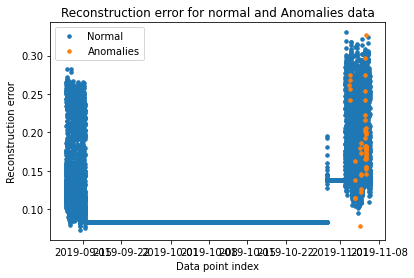

In [55]:
#plt.figure(figsize=(18,10))
threshold_fixed = 0.15
groups = error_df.groupby('A')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomalies" if name == 1 else "Normal")
#ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and Anomalies data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index") 
plt.show();  

#### Calculate RMSE and MAE  

In [56]:
# Define a function to calculate MAE and RMSE
errors = test_x_predictions - x_good_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of autoencoder'+ ':') 
print('')
print('Mean Absolute Error: {:.4f}'.format(mae)) 
print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('')  

The performance  of autoencoder:

Mean Absolute Error: 0.1173
Mean Square Error:0.1002
Root Mean Square Error: 0.3165



### confusion_matrix

In [57]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score 
threshold_fixed = 0.15
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.A, pred_y)
plt.figure(figsize=(4, 4))

print(conf_matrix)
# sns.heatmap(conf_matrix, xticklabels=df1.A, yticklabels=df1.A, annot=True, fmt="d");
# plt.title("Confusion matrix")
# plt.ylabel('True class')
# plt.xlabel('Predicted class')
# plt.show() 



# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['A'], error_df['pred']))
#print(" Recall: ",recall_score(error_df['A'], error_df['pred']))
#print(" Precision: ",precision_score(error_df['A'], error_df['pred']))
print(classification_report(error_df['A'], error_df['pred']))   

[[29208  2744]
 [    9    43]]
 Accuracy:  0.9139795025621797
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     31952
         1.0       0.02      0.83      0.03        52

    accuracy                           0.91     32004
   macro avg       0.51      0.87      0.49     32004
weighted avg       1.00      0.91      0.95     32004



<Figure size 288x288 with 0 Axes>

#### Mean p-Powered Error for auto encoder 
- To enhance the perfomance of reall and precision  

In [154]:
test_x_predictions = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions, 4), axis=1)
error_df_mean_power = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)  
error_df_mean_power.head() 

,Reconstruction_error,A
time,,
2019-11-03 01:38:30,0.407243,0.0
2019-11-02 09:08:00,0.603368,0.0
2019-10-08 08:46:00,0.193101,0.0
2019-10-11 10:43:30,0.193101,0.0
2019-10-21 00:52:00,0.193101,0.0


In [155]:
error_df_mean_power.tail()

,Reconstruction_error,A
time,,
2019-10-13 21:40:30,0.193101,0.0
2019-10-13 14:16:30,0.193101,0.0
2019-09-18 07:12:00,0.193101,0.0
2019-09-15 17:59:00,0.193101,0.0
2019-09-14 00:19:30,0.613656,0.0


In [156]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score 
threshold_fixed = 0.61
pred_y = [1 if e > threshold_fixed else 0 for e in error_df_mean_power.Reconstruction_error.values]
error_df_mean_power['pred'] =pred_y
conf_matrix = confusion_matrix(error_df_mean_power.A, pred_y)
plt.figure(figsize=(4, 4))

print(conf_matrix)
# sns.heatmap(conf_matrix, xticklabels=df1.A, yticklabels=df1.A, annot=True, fmt="d");
# plt.title("Confusion matrix")
# plt.ylabel('True class')
# plt.xlabel('Predicted class')
# plt.show() 

# print classification report
#print(classification_report(error_df.A, pred_y) 

# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df_mean_power['A'], error_df_mean_power['pred']))
# print(" Recall: ",recall_score(error_df['A'], error_df['pred']))
# print(" Precision: ",precision_score(error_df['A'], error_df['pred']))   
# print classification report
print(classification_report(error_df_mean_power['A'], error_df_mean_power['pred']))  

[[28843  3109]
 [   10    42]]
 Accuracy:  0.9025434320709911
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     31952
         1.0       0.01      0.81      0.03        52

    accuracy                           0.90     32004
   macro avg       0.51      0.86      0.49     32004
weighted avg       1.00      0.90      0.95     32004



<Figure size 288x288 with 0 Axes>